In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/2025/08 - August/'
AMS_paths = ['250822_Sabinene_100ppb_0C/', '250825_Sabinene_100ppb_10C/', '250826_Sabinene_100ppb_neg10C/']

SMPS = import_SMPS(f'{path}250822_Sabinene_100ppb_0C/SMPS/Mass/', '', 0)
SMPS[SMPS.keys()[38]] = SMPS[SMPS.keys()[38]]*1.5
bin_labels = SMPS.keys()[42:-1]
bin_Dp = [7.04]
for label in bin_labels:
    bin_Dp.append(float(label))

AMS = {}
for AMS_path in AMS_paths:
    df = import_txt(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    AMS[name] = df

print(AMS['250822'].keys())
print(bin_Dp)

Index(['t_series', 'HROrg_M_all', 'HRNO3_M_all', 'HRSO4_M_all', 'HRNH4_M_all',
       'HRChl_M_all', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'familyCHN_M_all', 'familyCHO1_M_all', 'familyCHO1N_M_all',
       'familyCH_M_all', 'MSSM_all_HROrg43', 'MSSM_all_HROrg44', 'Time'],
      dtype='object')
[7.04, 9.06, 9.22, 9.39, 9.56, 9.73, 9.91, 10.09, 10.27, 10.46, 10.65, 10.84, 11.04, 11.24, 11.44, 11.65, 11.86, 12.08, 12.3, 12.52, 12.75, 12.98, 13.22, 13.46, 13.7, 13.95, 14.2, 14.46, 14.72, 14.99, 15.26, 15.54, 15.82, 16.11, 16.4, 16.7, 17.0, 17.31, 17.62, 17.94, 18.27, 18.6, 18.94, 19.28, 19.63, 19.99, 20.35, 20.72, 21.1, 21.48, 21.87, 22.27, 22.67, 23.08, 23.5, 23.93, 24.36, 24.8, 25.25, 25.71, 26.18, 26.66, 27.14, 27.63, 28.13, 28.64, 29.16, 29.69, 30.23, 30.78, 31.34, 31.91, 32.49, 33.08, 33.68, 34.29, 34.91, 35.55, 36.19, 36.85, 37.52, 38.2, 38.89, 39.6, 40.32, 41.05, 41.79, 42.55, 43.32, 44.11, 44.91, 45.73, 46.56, 47.4, 48.26, 49.14, 50.03, 50.94, 51.86, 52.8, 53.76, 54.74, 55

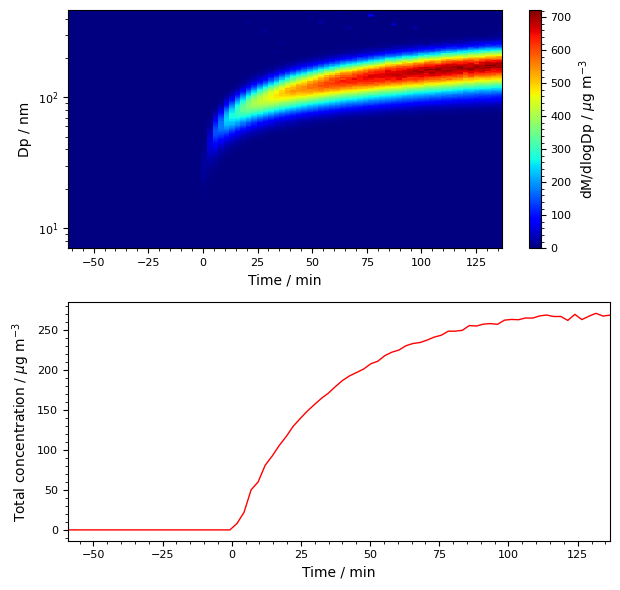

In [3]:
fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

plot_timeseries(fig, ax, SMPS, bin_labels, bin_Dp, 'mass', ['2025-08-22 09:15', '2025-08-22 12:33'], True, SMPS.keys()[38], None, False, '2025-08-22 10:15:00')

fig.tight_layout()

[Text(0, 0.5, 'Concentration / $\\mu$g m$^{-3}$')]

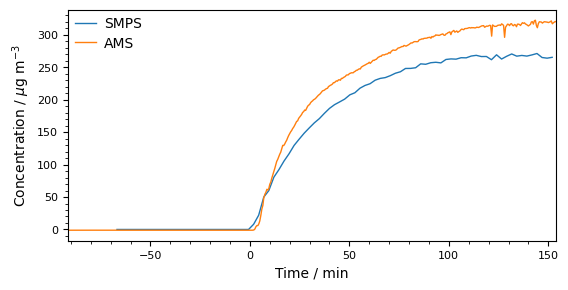

In [4]:
fig, ax = plt.subplots(figsize = (6.3, 3))

plot_total(ax, SMPS, SMPS.keys()[38], None, False, '2025-08-22 10:15:00')
plot_total(ax, AMS['250822'], 'HROrg_M_all', None, False, '2025-08-22 10:15:00')

ax.legend(labels = ['SMPS', 'AMS'])
ax.set(ylabel = 'Concentration / $\mu$g m$^{-3}$')

66 66
f(x) = 0.8536970279048957x + 1.140373856465219, R2 = 0.9990500115419988


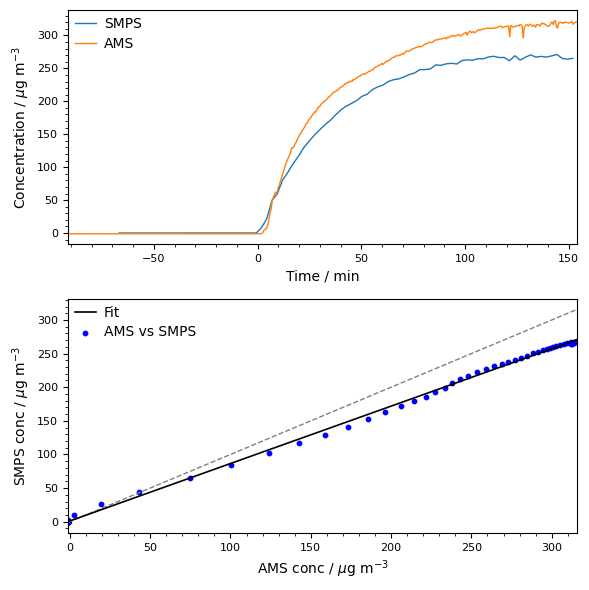

In [5]:
Running_AMS = running_mean(AMS['250822'], ['HROrg_M_all'], 'Time', '3T', 3, ['2025-08-22 09:15', '2025-08-22 12:30'])
Running_AMS['Time'] = Running_AMS.index
Running_AMS = Running_AMS.reset_index(drop = True)
Running_SMPS = running_mean(SMPS, [SMPS.keys()[38]], 'Time', '3T', 3, ['2025-08-22 09:15', '2025-08-22 12:33'])
Running_SMPS['Time'] = Running_SMPS.index
Running_SMPS = Running_SMPS.reset_index(drop = True)

print(len(Running_AMS['HROrg_M_all']), len(Running_SMPS[SMPS.keys()[38]]))

fig, axs = plt.subplots(2, 1, figsize = (6, 6))

plot_total(axs[0], SMPS, SMPS.keys()[38], None, False, '2025-08-22 10:15:00')
plot_total(axs[0], AMS['250822'], 'HROrg_M_all', None, False, '2025-08-22 10:15:00')

axs[0].legend(labels = ['SMPS', 'AMS'])
axs[0].set(ylabel = 'Concentration / $\mu$g m$^{-3}$')

instrument_comparison(axs[1], Running_AMS['HROrg_M_all'], Running_SMPS[SMPS.keys()[38]], 'AMS vs SMPS', ['AMS conc / $\mu$g m$^{-3}$', 'SMPS conc / $\mu$g m$^{-3}$'], False)

fig.tight_layout()
fig.savefig('AMSvsSMPS.jpg', dpi = 600)